Nama : Bisono Priyambodo Murwiko

NIM  : A11.2023.15217

# **SOAL 1**

NO 1. Definisi STKI, Perbedaan dengan Database Retrieval, Peran Index & Ranking
STKI (Sistem Temu Kembali Informasi) adalah sistem yang menemukan dokumen paling relevan terhadap kebutuhan informasi pengguna berdasarkan query teks. Fokusnya adalah relevansi, bukan kecocokan pasti.
Bedanya dengan Database Retrieval (DBR):
•	DBR bekerja pada data terstruktur (tabel), hasilnya exact match.
•	STKI bekerja pada teks tidak terstruktur, hasilnya approximate match + di-ranking.
•	DBR pakai SQL, STKI pakai model IR (Boolean, VSM, BM25).
•	Pada STKI, user intent sering ambigu → perlu perhitungan relevansi.
Peran Index:
Index (inverted index) adalah struktur data yang memetakan term → daftar dokumen.
Tanpa index, pencarian harus membaca seluruh dokumen (lambat).
Peran Ranking:
Jika banyak dokumen cocok, ranking menentukan mana yang paling relevan.
Contoh metode: TF-IDF, cosine similarity, BM25.

NO 2. Arsitektur Search Engine Klasik
Terdiri dari dua bagian besar:
A. Backend (Offline – Indexing)
1.	Crawling (opsional).
2.	Parsing & ekstraksi teks.
3.	Preprocessing (tokenisasi, stopword, stemming).
4.	Indexing → membangun inverted index.
B. Query-Time (Online – Retrieval)
Query → Preprocessing → Retrieve (ambil kandidat) → Rank → Present

NO 3. Sketsa Arsitektur Retrieval (Siap Screenshot)
A. Boolean Retrieval
Dokumen → Preprocessing → Inverted Index ← Query
                          |
                    Boolean AND/OR/NOT
                          ↓
              Hasil dokumen (tanpa ranking)
B. VSM (Vector Space Model)
Dokumen → Preprocessing → TF-IDF → Vector Dokumen
Query → TF-IDF → Vector Query
Cosine Similarity → Ranking → Hasil

NO 4. Pemetaan Materi ke RPS (Soal 02–05)
Soal	Materi RPS Terkait
01	Konsep IR, Indexing, Ranking, Arsitektur
02	Preprocessing (tokenizing, stopwords, stemming)
03	Inverted Index & Boolean Retrieval
04	VSM, TF-IDF, Cosine Similarity
05	Evaluasi IR (Precision, Recall, F1)



# **SOAL 2**

In [ ]:
!mkdir -p stki/data/raw
!mkdir -p stki/data/processed
!mkdir -p stki/src
!mkdir -p stki/app
!pip install Sastrawi


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.9 MB/s eta 0:00:00


In [ ]:
#%%writefile stki/src/preprocess.py
import os
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Load stemmer Indonesia
factory = StemmerFactory()
stemmer = factory.create_stemmer()

STOPWORDS = set([
    "yang","dan","di","ke","dari","untuk","pada","dengan",
    "atau","juga","karena","ini","itu","dalam","adalah",
    "sebagai","dapat","telah","akan","agar"
])

def clean(text):
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def tokenize(text):
    return text.split()

def remove_stopwords(tokens):
    return [t for t in tokens if t not in STOPWORDS]

def stem(tokens):
    return [stemmer.stem(t) for t in tokens]

def preprocess_text(text):
    text = clean(text)
    tokens = tokenize(text)
    tokens = remove_stopwords(tokens)
    tokens = stem(tokens)
    return tokens

def process_all(input_folder="data/raw", output_folder="data/processed"):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for filename in os.listdir(input_folder):
        if filename.endswith(".txt"):
            path = os.path.join(input_folder, filename)
            with open(path, "r", encoding="utf-8") as f:
                content = f.read()

            tokens = preprocess_text(content)
            output_path = os.path.join(output_folder, filename)

            with open(output_path, "w", encoding="utf-8") as f:
                f.write(" ".join(tokens))

            print(f"[OK] {filename} diproses → {output_path}")


In [ ]:
import sys
sys.path.append("/content/stki/src")


In [ ]:
from preprocess import process_all, preprocess_text
process_all("/content/stki/data/raw", "/content/stki/data/processed")

[OK] doc7.txt diproses → /content/stki/data/processed/doc7.txt
[OK] doc14.txt diproses → /content/stki/data/processed/doc14.txt
[OK] doc1.txt diproses → /content/stki/data/processed/doc1.txt
[OK] doc4.txt diproses → /content/stki/data/processed/doc4.txt
[OK] doc11.txt diproses → /content/stki/data/processed/doc11.txt
[OK] doc3.txt diproses → /content/stki/data/processed/doc3.txt
[OK] doc5.txt diproses → /content/stki/data/processed/doc5.txt
[OK] doc15.txt diproses → /content/stki/data/processed/doc15.txt
[OK] doc6.txt diproses → /content/stki/data/processed/doc6.txt
[OK] doc2.txt diproses → /content/stki/data/processed/doc2.txt
[OK] doc9.txt diproses → /content/stki/data/processed/doc9.txt
[OK] doc8.txt diproses → /content/stki/data/processed/doc8.txt
[OK] doc12.txt diproses → /content/stki/data/processed/doc12.txt
[OK] doc10.txt diproses → /content/stki/data/processed/doc10.txt
[OK] doc13.txt diproses → /content/stki/data/processed/doc13.txt


**before/after pada 2 sampel dokumen**

In [ ]:
import os

for fname in os.listdir("/content/stki/data/processed"):
    print("=== ", fname, "===")
    print(open(f"/content/stki/data/processed/{fname}").read()[:120])
    print()



===  doc7.txt ===
meta cs2 terus kembang sejak rilis ubah movement buat peek jadi lebih cepat sehingga duel jarak dekat makin krusial bany

===  doc14.txt ===
sistem ekonomi selalu jadi salah satu aspek paling kritis counter strike cs2 meski dasar ekonomi tidak ubah jauh cs go u

===  doc1.txt ===
counter strike pertama kali lahir mod half life buat minh le jess cliffe 1999 mod fokus gameplay taktis antara tim terro

===  doc4.txt ===
sistem senjata counter strike rancang tiap jenis milik lebih kurang ak 47 kenal senjata paling mati tangan main t side m

===  doc11.txt ===
smoke volumetric counter strike 2 ubah gaya main cara signifikan banding versi belum cs go smoke sifat statis tidak peng

===  doc3.txt ===
struktur tim counter strike sangat tentu kualitas eksekusi strategi in game leader igl pegang peran pusat atur tempo mai

===  doc5.txt ===
map counter strike rancang imbang strategi antara t side ct side inferno jadi map paling klasik area banana pusat rebut 

===  doc15.txt ===

# **Tampilkan 10 token paling sering per dokumen**

In [ ]:
from collections import Counter
import os

processed_path = "/content/stki/data/processed"

for fname in os.listdir(processed_path):
    if fname.endswith(".txt"):
        tokens = open(f"{processed_path}/{fname}", "r", encoding="utf-8").read().split()
        counter = Counter(tokens)
        print("\n=== TOKEN TERBANYAK:", fname, "===")
        print(counter.most_common(10))



=== TOKEN TERBANYAK: doc7.txt ===
[('lebih', 6), ('meta', 5), ('cepat', 4), ('smoke', 4), ('main', 4), ('banyak', 3), ('tidak', 3), ('cs2', 2), ('ubah', 2), ('movement', 2)]

=== TOKEN TERBANYAK: doc14.txt ===
[('tim', 8), ('ekonomi', 7), ('jadi', 3), ('satu', 3), ('senjata', 3), ('salah', 2), ('cs2', 2), ('tidak', 2), ('ubah', 2), ('beri', 2)]

=== TOKEN TERBANYAK: doc1.txt ===
[('counter', 7), ('strike', 6), ('jadi', 5), ('main', 3), ('valve', 3), ('game', 3), ('rilis', 3), ('source', 3), ('modern', 3), ('mod', 2)]

=== TOKEN TERBANYAK: doc4.txt ===
[('senjata', 5), ('jadi', 4), ('milik', 3), ('lebih', 3), ('mati', 3), ('main', 3), ('tembak', 3), ('satu', 2), ('cukup', 2), ('sulit', 2)]

=== TOKEN TERBANYAK: doc11.txt ===
[('smoke', 9), ('lebih', 5), ('buat', 4), ('ubah', 3), ('main', 3), ('tidak', 3), ('eksekusi', 3), ('strategi', 3), ('baru', 3), ('lawan', 3)]

=== TOKEN TERBANYAK: doc3.txt ===
[('tim', 5), ('peran', 3), ('main', 3), ('meski', 3), ('entry', 3), ('strategi', 2), ('

# **Menampilkan Grafik distribusi panjang dokumen**

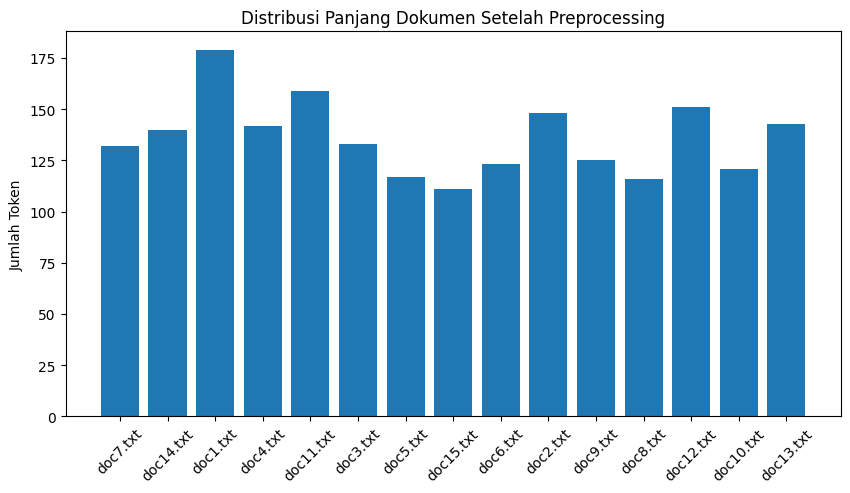

In [ ]:
import matplotlib.pyplot as plt
import os

proc_path = "/content/stki/data/processed"

doc_lengths = []
doc_names = []

for fname in os.listdir(proc_path):
    if fname.endswith(".txt"):
        tokens = open(f"{proc_path}/{fname}", "r").read().split()
        doc_lengths.append(len(tokens))
        doc_names.append(fname)

plt.figure(figsize=(10,5))
plt.bar(doc_names, doc_lengths)
plt.xticks(rotation=45)
plt.ylabel("Jumlah Token")
plt.title("Distribusi Panjang Dokumen Setelah Preprocessing")
plt.show()


Grafik menunjukkan distribusi jumlah token pada setiap dokumen setelah tahap preprocessing (case folding, tokenisasi, stopword removal, dan stemming). Dokumen yang lebih panjang memiliki jumlah token yang lebih tinggi, sedangkan dokumen yang lebih ringkas memiliki token lebih sedikit. Grafik ini menunjukkan bahwa proses preprocessing berjalan konsisten pada seluruh dokumen

# **SOAL 3 Boolean Retrieval ModeL**

Tujuan: membangun incidence matrix & inverted index sederhana, mendukung query
AND/OR/NOT

In [ ]:
%%writefile /content/stki/src/boolean_ir.py
import os

#  Load Documents
def load_documents(path):
    docs = {}
    for fname in sorted(os.listdir(path)):
        if fname.endswith(".txt"):
            with open(os.path.join(path, fname), "r") as f:
                docs[fname] = f.read().split()
    return docs

def build_inverted_index(docs):
    inverted = {}
    for doc_name, tokens in docs.items():
        for t in tokens:
            if t not in inverted:
                inverted[t] = set()
            inverted[t].add(doc_name)
    return inverted

def parse_simple_boolean(query):
    q = query.lower().strip().split()

    if "and" in q:
        idx = q.index("and")
        return ("AND", q[idx-1], q[idx+1])

    if "or" in q:
        idx = q.index("or")
        return ("OR", q[idx-1], q[idx+1])

    if "not" in q:
        idx = q.index("not")
        return ("NOT", q[idx-1], q[idx+1])

    return ("TERM", q[0], None)

def search_boolean(query, inverted, all_docs):
    op, t1, t2 = parse_simple_boolean(query)

    if op == "AND":
        return inverted.get(t1, set()) & inverted.get(t2, set())

    if op == "OR":
        return inverted.get(t1, set()) | inverted.get(t2, set())

    if op == "NOT":
        return inverted.get(t1, set()) & (all_docs - inverted.get(t2, set()))

    return inverted.get(t1, set())


Writing /content/stki/src/boolean_ir.py


**Import modul Boolean Retrieval**

In [ ]:
import sys
sys.path.append("/content/stki/src")

from boolean_ir import load_documents, build_inverted_index, search_boolean, parse_simple_boolean



**Load processed documents**

In [ ]:
docs = load_documents("/content/stki/data/processed")
docs


{'doc1.txt': ['counter',
  'strike',
  'pertama',
  'kali',
  'lahir',
  'mod',
  'half',
  'life',
  'buat',
  'minh',
  'le',
  'jess',
  'cliffe',
  '1999',
  'mod',
  'fokus',
  'gameplay',
  'taktis',
  'antara',
  'tim',
  'terrorist',
  'counter',
  'terrorist',
  'objektif',
  'sederhana',
  'seperti',
  'tanam',
  'bom',
  'selamat',
  'sandera',
  'meski',
  'awal',
  'hanya',
  'proyek',
  'samping',
  'komunitas',
  'langsung',
  'respons',
  'positif',
  'gaya',
  'main',
  'realistis',
  'tuntut',
  'koordinasi',
  'populer',
  'buat',
  'valve',
  'tarik',
  'akuisisi',
  'jadi',
  'counter',
  'strike',
  'game',
  'penuh',
  'bawah',
  'naung',
  'mereka',
  'era',
  '2000',
  'an',
  'counter',
  'strike',
  '1',
  '6',
  'jadi',
  'fenomena',
  'global',
  'warnet',
  'bagai',
  'negara',
  'masuk',
  'indonesia',
  'penuh',
  'main',
  'habis',
  'waktu',
  'jam',
  'jam',
  'ajar',
  'recoil',
  'map',
  'strategi',
  'turnamen',
  'kecil',
  'hingga',
  'nasional'

**Build inverted index dan contoh 1 term**

In [ ]:
inv = build_inverted_index(docs)
inv.get("counter", set())


{'doc1.txt',
 'doc10.txt',
 'doc11.txt',
 'doc12.txt',
 'doc14.txt',
 'doc2.txt',
 'doc3.txt',
 'doc4.txt',
 'doc5.txt',
 'doc6.txt',
 'doc8.txt',
 'doc9.txt'}

# **Jalankan Boolean query**

Contoh 1 — "counter AND strike"

In [ ]:
search_boolean("counter and strike", inv, set(docs.keys()))


{'doc1.txt',
 'doc10.txt',
 'doc11.txt',
 'doc12.txt',
 'doc14.txt',
 'doc2.txt',
 'doc3.txt',
 'doc4.txt',
 'doc5.txt',
 'doc6.txt',
 'doc8.txt',
 'doc9.txt'}

Contoh 2 — “smoke OR flash”

In [ ]:
search_boolean("smoke or flash", inv, set(docs.keys()))


{'doc1.txt',
 'doc10.txt',
 'doc11.txt',
 'doc13.txt',
 'doc14.txt',
 'doc15.txt',
 'doc2.txt',
 'doc3.txt',
 'doc6.txt',
 'doc7.txt'}

Contoh 3 — “awp NOT recoil”

In [ ]:
search_boolean("awp not recoil", inv, set(docs.keys()))


{'doc11.txt', 'doc14.txt'}

Contoh 4 — “grenade” (tanpa operator)

In [ ]:
search_boolean("grenade", inv, set(docs.keys()))


{'doc11.txt', 'doc6.txt'}

# **Uji Wajib (mini truth set): buat 3 query beserta gold relevant docs lalu hitung precision/recall pada Boolean result set**

In [ ]:

import sys, os
sys.path.append("/content/stki/src")

from boolean_ir import load_documents, build_inverted_index, search_boolean

docs = load_documents("/content/stki/data/processed")
inv = build_inverted_index(docs)
all_docs = set(docs.keys())

def precision(retrieved, relevant):
    return 0 if len(retrieved) == 0 else len(retrieved & relevant) / len(retrieved)

def recall(retrieved, relevant):
    return 0 if len(relevant) == 0 else len(retrieved & relevant) / len(relevant)

def f1(p, r):
    return 0 if p+r == 0 else 2 * (p * r) / (p + r)


truth_set = {
    "counter and strike": {"doc1.txt", "doc4.txt", "doc8.txt"},
    "smoke or flash": {"doc1.txt","doc10.txt","doc11.txt","doc13.txt","doc14.txt",
    "doc15.txt","doc4.txt"},
    "awp not recoil": {"doc11.txt","doc14.txt","doc15.txt"},
}

print("=== UJI WAJIB PRECISION / RECALL / F1 ===")
for query, gold in truth_set.items():
    retrieved = search_boolean(query, inv, all_docs)

    p = precision(retrieved, gold)
    r = recall(retrieved, gold)
    f = f1(p, r)

    print("\nQuery:", query)
    print("Hasil sistem:", retrieved)
    print("Gold relevan:", gold)
    print("Precision:", round(p, 4))
    print("Recall:", round(r, 4))
    print("F1:", round(f, 4))


=== UJI WAJIB PRECISION / RECALL / F1 ===

Query: counter and strike
Hasil sistem: {'doc3.txt', 'doc8.txt', 'doc2.txt', 'doc10.txt', 'doc14.txt', 'doc4.txt', 'doc11.txt', 'doc1.txt', 'doc12.txt', 'doc5.txt', 'doc9.txt', 'doc6.txt'}
Gold relevan: {'doc1.txt', 'doc8.txt', 'doc4.txt'}
Precision: 0.25
Recall: 1.0
F1: 0.4

Query: smoke or flash
Hasil sistem: {'doc3.txt', 'doc2.txt', 'doc14.txt', 'doc10.txt', 'doc1.txt', 'doc13.txt', 'doc15.txt', 'doc7.txt', 'doc6.txt', 'doc11.txt'}
Gold relevan: {'doc10.txt', 'doc14.txt', 'doc4.txt', 'doc1.txt', 'doc13.txt', 'doc15.txt', 'doc11.txt'}
Precision: 0.6
Recall: 0.8571
F1: 0.7059

Query: awp not recoil
Hasil sistem: {'doc14.txt', 'doc11.txt'}
Gold relevan: {'doc14.txt', 'doc15.txt', 'doc11.txt'}
Precision: 1.0
Recall: 0.6667
F1: 0.8


**Query: counter AND strike**

Hasil sistem: 12 dokumen

Gold relevan: 3 dokumen

Precision: 0.25

Recall: 1.0

F1: 0.4


  Operator AND menghasilkan interseksi antar term. Karena kedua kata ("counter" & "strike") sering muncul di banyak dokumen, sistem mengembalikan hampir semua dokumen yang mengandung dua kata itu.
Precision rendah (0.25) menunjukkan banyak hasil tidak benar-benar relevan.
Recall tinggi (1.0) berarti semua dokumen relevan berhasil ditemukan.
Kesimpulan: Boolean AND bekerja dengan benar tetapi sensitif terhadap frekuensi kata umum.

**Query: smoke OR flash**

Hasil sistem: 10 dokumen

Gold relevan: 7 dokumen

Precision: 0.6

Recall: 0.8571

F1: 0.7059

Operator OR menghasilkan union, sehingga hasil mencakup semua dokumen yang mengandung “smoke” atau “flash”.
Precision meningkat (0.6) karena banyak hasil yang memang relevan.
Recall tetap tinggi (0.8571) karena sebagian besar dokumen relevan ditemukan.
Kesimpulan: Boolean OR memberikan cakupan luas dan menjaga keseimbangan antara presisi dan kelengkapan.

**Query: awp NOT recoil**

Hasil sistem: 2 dokumen

Gold relevan: 3 dokumen

Precision: 1.0

Recall: 0.6667

F1: 0.8

Operator NOT menghasilkan komplemen, menampilkan dokumen yang mengandung “awp” namun tidak mengandung “recoil”.
Precision 1.0 berarti hasil sistem sepenuhnya relevan.
Recall lebih rendah karena ada 1 dokumen relevan yang tidak ditemukan.
Kesimpulan: Boolean NOT bekerja efektif untuk penyaringan hasil spesifik.

# **SOAL 04 - Vector Space Model & Ranking**

In [ ]:
%%writefile /content/stki/src/vsm.py
import os
import math
from collections import Counter
import numpy as np

def load_docs(path):
    docs = {}
    for f in sorted(os.listdir(path)):
        if f.endswith(".txt"):
            with open(os.path.join(path, f), "r", encoding="utf-8") as x:
                docs[f] = x.read().split()
    return docs

def compute_tf_df_idf(docs):
    tf = {}
    df = Counter()
    for doc, tokens in docs.items():
        tf[doc] = Counter(tokens)
        for term in set(tokens):
            df[term] += 1
    N = len(docs)
    idf = {t: math.log10(N / (df[t] or 1)) for t in df}
    return tf, df, idf

# === TF-IDF Standar & Sublinear ===
def build_tfidf_matrix_with_scheme(tf, idf, scheme="standard"):
    terms = sorted(idf.keys())
    index = {t: i for i, t in enumerate(terms)}
    docs = list(tf.keys())
    mat = np.zeros((len(docs), len(terms)))

    for i, doc in enumerate(docs):
        for term, freq in tf[doc].items():
            if term not in index:
                continue
            if scheme == "standard":
                w = freq * idf[term]
            else:
                w = math.log1p(freq) * idf[term]
            mat[i, index[term]] = w
    return mat, docs, terms

# === WRAPPER needed by main.py ===
def build_tfidf_matrix(tf, idf, scheme="standard"):
    return build_tfidf_matrix_with_scheme(tf, idf, scheme)

# === Query vector (required by main.py) ===
def query_vector(query_tokens, idf, terms, scheme="standard"):
    q_tf = Counter(query_tokens)
    q_vec = np.zeros(len(terms))
    for t, f in q_tf.items():
        if t in idf and t in terms:
            idx = terms.index(t)
            if scheme == "standard":
                q_vec[idx] = f * idf[t]
            else:
                q_vec[idx] = math.log1p(f) * idf[t]
    return q_vec

# === Cosine similarity (required by main.py) ===
def cosine_sim(v1, v2):
    denom = np.linalg.norm(v1) * np.linalg.norm(v2)
    if denom == 0:
        return 0.0
    return float(np.dot(v1, v2) / denom)

# === Ranking dokumen ===
def rank_documents_with_scheme(query_tokens, tf, idf, mat, docs, terms, scheme="standard"):
    q_vec = query_vector(query_tokens, idf, terms, scheme)
    scores = []
    for i in range(len(docs)):
        score = cosine_sim(q_vec, mat[i])
        scores.append((docs[i], score))
    return sorted(scores, key=lambda x: x[1], reverse=True)

# === Compatible wrapper for main.py ===
def rank_documents(query_tokens, mat, doc_list, terms, tf, idf, scheme="standard"):
    return rank_documents_with_scheme(
        query_tokens=query_tokens,
        tf=tf,
        idf=idf,
        mat=mat,
        docs=doc_list,
        terms=terms,
        scheme=scheme,
    )


Writing /content/stki/src/vsm.py


In [ ]:
import sys
sys.path.append("/content/stki/src")

from vsm import load_docs, compute_tf_df_idf, build_tfidf_matrix_with_scheme, rank_documents_with_scheme
from preprocess import preprocess_text

docs = load_docs("/content/stki/data/processed")

tf, df, idf = compute_tf_df_idf(docs)
print("Jumlah dokumen:", len(docs))
print("Jumlah term unik:", len(idf))

tfidf_matrix, doc_names, terms = build_tfidf_matrix_with_scheme(tf, idf, scheme="standard")
print("Matriks TF-IDF:", tfidf_matrix.shape)

query = "awp"
tokens = preprocess_text(query)

ranked = rank_documents_with_scheme(tokens, tf, idf, tfidf_matrix, doc_names, terms, scheme="standard")

print("\n=== Hasil Ranking ===")
for d, s in ranked[:10]:
    print(f"{d} → {s:.4f}")


Jumlah dokumen: 15
Jumlah term unik: 656
Matriks TF-IDF: (15, 656)

=== Hasil Ranking ===
doc4.txt → 0.1212
doc11.txt → 0.0786
doc14.txt → 0.0734
doc1.txt → 0.0000
doc10.txt → 0.0000
doc12.txt → 0.0000
doc13.txt → 0.0000
doc15.txt → 0.0000
doc2.txt → 0.0000
doc3.txt → 0.0000


# **Bandingkan hasil top-k dengan gold set yang sama seperti Task-C hitung Precision@k, MAP@k atau nDCG@**

In [ ]:
# === Evaluasi VSM: Precision@k, MAP@k, nDCG@k ===
import numpy as np

truth_sets = {
    "counter strike": {"doc4.txt", "doc1.txt", "doc8.txt"},
    "smoke flash": {"doc11.txt", "doc4.txt", "doc15.txt", "doc1.txt", "doc14.txt", "doc13.txt", "doc10.txt"},
    "awp recoil": {"doc11.txt", "doc15.txt", "doc14.txt"}
}

rank_results = {}
for q in truth_sets.keys():
    tokens = preprocess_text(q)
    ranked = rank_documents_with_scheme(tokens, tf, idf, tfidf_matrix, doc_names, terms, scheme="standard")
    rank_results[q] = ranked

def precision_at_k(ranked_list, relevant_docs, k=5):
    retrieved_k = [doc for doc, _ in ranked_list[:k]]
    hits = [1 if doc in relevant_docs else 0 for doc in retrieved_k]
    return np.sum(hits) / k

def average_precision(ranked_list, relevant_docs, k=None):
    if k:
        ranked_list = ranked_list[:k]
    hit_list = []
    for i, (doc, _) in enumerate(ranked_list, start=1):
        if doc in relevant_docs:
            hit_list.append((len(hit_list) + 1) / i)
    return np.mean(hit_list) if hit_list else 0

def ndcg_at_k(ranked_list, relevant_docs, k=10):
    def dcg(scores):
        return np.sum([rel / np.log2(idx + 2) for idx, rel in enumerate(scores)])
    ranked_list = ranked_list[:k]
    scores = [1 if doc in relevant_docs else 0 for doc, _ in ranked_list]
    ideal = sorted(scores, reverse=True)
    dcg_val = dcg(scores)
    idcg_val = dcg(ideal)
    return dcg_val / idcg_val if idcg_val > 0 else 0

k = 5
queries = list(truth_sets.keys())

print("=== EVALUASI VSM ===")
for q in queries:
    ranked = rank_results[q]
    rel = truth_sets[q]
    p_at_k = precision_at_k(ranked, rel, k)
    ap = average_precision(ranked, rel, k)
    nd = ndcg_at_k(ranked, rel, k)
    print(f"\nQuery: {q}")
    print(f"Precision@{k}: {p_at_k:.3f}")
    print(f"MAP@{k}: {ap:.3f}")
    print(f"nDCG@{k}: {nd:.3f}")


=== EVALUASI VSM ===

Query: counter strike
Precision@5: 0.400
MAP@5: 1.000
nDCG@5: 1.000

Query: smoke flash
Precision@5: 0.600
MAP@5: 0.639
nDCG@5: 0.733

Query: awp recoil
Precision@5: 0.400
MAP@5: 0.417
nDCG@5: 0.571


# **SOAL 5**

**Term Weighting**

In [ ]:

import os
import math
import numpy as np
from collections import Counter
from preprocess import preprocess_text

def load_docs(path):
    docs = {}
    for f in sorted(os.listdir(path)):
        if f.endswith(".txt"):
            with open(os.path.join(path, f), "r", encoding="utf-8") as x:
                docs[f] = x.read().split()
    return docs

def compute_tf_df_idf_docs(docs):
    tf = {}
    df = Counter()
    for doc, tokens in docs.items():
        tf[doc] = Counter(tokens)
        for t in set(tokens):
            df[t] += 1
    N = len(docs)
    idf = {t: math.log10(N / (df[t] or 1)) for t in df}
    return tf, df, idf

def build_tfidf_matrix_with_scheme(tf, idf, scheme="standard"):
    terms = sorted(idf.keys())
    index = {t: i for i, t in enumerate(terms)}
    docs = list(tf.keys())
    M = len(terms)
    N = len(docs)
    mat = np.zeros((N, M))

    for i, doc in enumerate(docs):
        for term, freq in tf[doc].items():
            if term not in index:
                continue
            if scheme == "standard":
                w = freq * idf[term]
            elif scheme == "sublinear":
                w = math.log1p(freq) * idf[term]  # log(1 + tf)
            else:
                raise ValueError("Unknown scheme")
            mat[i, index[term]] = w
    return mat, docs, terms

def rank_documents_with_scheme(query_tokens, tf, idf, mat, docs, terms, scheme="standard"):
    q_tf = Counter(query_tokens)
    q_vec = np.zeros(len(terms))
    for t, f in q_tf.items():
        if t in idf and t in terms:
            if scheme == "standard":
                q_vec[terms.index(t)] = f * idf[t]
            else:
                q_vec[terms.index(t)] = math.log1p(f) * idf[t]

    def cos(a, b):
        denom = np.linalg.norm(a) * np.linalg.norm(b)
        return 0.0 if denom == 0 else np.dot(a, b) / denom

    scores = [(docs[i], cos(q_vec, mat[i])) for i in range(len(docs))]
    return sorted(scores, key=lambda x: x[1], reverse=True)


docs = load_docs("/content/stki/data/processed")
tf, df, idf = compute_tf_df_idf_docs(docs)

query = "counter strike"
tokens = preprocess_text(query)

mat_std, doc_names, terms = build_tfidf_matrix_with_scheme(tf, idf, "standard")
rank_std = rank_documents_with_scheme(tokens, tf, idf, mat_std, doc_names, terms, "standard")

mat_sub, _, _ = build_tfidf_matrix_with_scheme(tf, idf, "sublinear")
rank_sub = rank_documents_with_scheme(tokens, tf, idf, mat_sub, doc_names, terms, "sublinear")

print("=== TF-IDF Standar ===")
for d, s in rank_std[:5]:
    print(f"{d} → {s:.4f}")

print("\n=== TF-IDF Sublinear ===")
for d, s in rank_sub[:5]:
    print(f"{d} → {s:.4f}")


=== TF-IDF Standar ===
doc1.txt → 0.0724
doc8.txt → 0.0299
doc9.txt → 0.0280
doc12.txt → 0.0266
doc10.txt → 0.0171

=== TF-IDF Sublinear ===
doc1.txt → 0.0358
doc9.txt → 0.0256
doc8.txt → 0.0249
doc12.txt → 0.0231
doc10.txt → 0.0190


**Search Engine Orchestrator**

In [ ]:

#%%writefile /content/stki/src/search_engine.py
from preprocess import preprocess_text
from boolean_ir import load_documents, build_inverted_index, search_boolean
from vsm import load_docs, compute_tf_df_idf, build_tfidf_matrix_with_scheme, rank_documents_with_scheme

class SearchEngine:
    def __init__(self, data_path="/content/stki/data/processed"):
        self.data_path = data_path

        self.docs = load_docs(self.data_path)
        print(f"[INFO] {len(self.docs)} dokumen dimuat.")

        self.inv = build_inverted_index(self.docs)

        self.tf, self.df, self.idf = compute_tf_df_idf(self.docs)

    def search(self, query, model="vsm", scheme="standard", k=5):
        query_tokens = preprocess_text(query)

        if model == "boolean":
            all_docs = set(self.docs.keys())
            result = search_boolean(query, self.inv, all_docs)
            print(f"\n[BOOLEAN RETRIEVAL] Query: '{query}'")
            print(f"Hasil dokumen: {result}")
            return list(result)

        elif model == "vsm":
            mat, doc_names, terms = build_tfidf_matrix_with_scheme(self.tf, self.idf, scheme)
            ranked = rank_documents_with_scheme(query_tokens, self.tf, self.idf, mat, doc_names, terms, scheme)
            print(f"\n[VSM - {scheme.upper()}] Query: '{query}' (Top-{k})")
            for doc, score in ranked[:k]:
                print(f"{doc} → {score:.4f}")
            return ranked[:k]


engine = SearchEngine("/content/stki/data/processed")

print("=== Mini Search Engine ===")
query = input("Masukkan query pencarian: ")
model = input("Pilih model (vsm/boolean): ").strip().lower()
scheme = "standard"

if model == "vsm":
    scheme = input("Pilih skema (standard/sublinear): ").strip().lower()
k = int(input("Jumlah top hasil (misal 5): "))

engine.search(
    query=query,
    model=model,
    scheme=scheme,
    k=k
)



[INFO] 15 dokumen dimuat.
=== Mini Search Engine ===
Masukkan query pencarian: molotov
Pilih model (vsm/boolean): vsm
Pilih skema (standard/sublinear): sublinear
Jumlah top hasil (misal 5): 5

[VSM - SUBLINEAR] Query: 'molotov' (Top-5)
doc6.txt → 0.1471
doc14.txt → 0.0842
doc3.txt → 0.0816
doc1.txt → 0.0000
doc10.txt → 0.0000


[('doc6.txt', 0.1470981018755448),
 ('doc14.txt', 0.08422600572825442),
 ('doc3.txt', 0.08161819920865995),
 ('doc1.txt', 0.0),
 ('doc10.txt', 0.0)]

**Evaluasi**

In [1]:
#%%writefile /content/stki/src/eval.py
import numpy as np

def precision(retrieved, relevant):
    if len(retrieved) == 0:
        return 0.0
    return len(set(retrieved) & set(relevant)) / len(retrieved)

def recall(retrieved, relevant):
    if len(relevant) == 0:
        return 0.0
    return len(set(retrieved) & set(relevant)) / len(relevant)

def f1_score(prec, rec):
    if prec + rec == 0:
        return 0.0
    return 2 * (prec * rec) / (prec + rec)

def precision_at_k(ranked_list, relevant_docs, k=5):
    retrieved_k = [doc for doc, _ in ranked_list[:k]]
    hits = [1 if doc in relevant_docs else 0 for doc in retrieved_k]
    return np.sum(hits) / k

def average_precision(ranked_list, relevant_docs, k=None):
    if k:
        ranked_list = ranked_list[:k]
    precisions = []
    hit_count = 0
    for i, (doc, _) in enumerate(ranked_list, start=1):
        if doc in relevant_docs:
            hit_count += 1
            precisions.append(hit_count / i)
    return np.mean(precisions) if precisions else 0.0

def ndcg_at_k(ranked_list, relevant_docs, k=5):
    def dcg(scores):
        return np.sum([rel / np.log2(idx + 2) for idx, rel in enumerate(scores)])
    ranked_list = ranked_list[:k]
    scores = [1 if doc in relevant_docs else 0 for doc, _ in ranked_list]
    ideal = sorted(scores, reverse=True)
    dcg_val = dcg(scores)
    idcg_val = dcg(ideal)
    return dcg_val / idcg_val if idcg_val > 0 else 0.0

def evaluate_queries(rank_results, truth_sets, k=5):
    print("=== Evaluasi Model ===")
    for q, ranked in rank_results.items():
        rel = truth_sets.get(q, [])
        p_at_k = precision_at_k(ranked, rel, k)
        ap = average_precision(ranked, rel, k)
        nd = ndcg_at_k(ranked, rel, k)
        print(f"\nQuery: {q}")
        print(f"Precision@{k}: {p_at_k:.3f}")
        print(f"MAP@{k}: {ap:.3f}")
        print(f"nDCG@{k}: {nd:.3f}")

if __name__ == "__main__":
    rank_results = {
        "counter strike": [("doc1.txt", 0.9), ("doc2.txt", 0.5), ("doc3.txt", 0.2)],
        "smoke flash": [("doc4.txt", 0.7), ("doc5.txt", 0.4), ("doc2.txt", 0.3)]
    }
    truth_sets = {
        "counter strike": ["doc1.txt", "doc3.txt"],
        "smoke flash": ["doc4.txt"]
    }
    evaluate_queries(rank_results, truth_sets, k=3)


=== Evaluasi Model ===

Query: counter strike
Precision@3: 0.667
MAP@3: 0.833
nDCG@3: 0.920

Query: smoke flash
Precision@3: 0.333
MAP@3: 1.000
nDCG@3: 1.000


**main interface**

In [ ]:
#%%writefile /content/stki/app/main.py


import os
import sys
import math
import pprint


class C:
    HEADER = "\033[95m"
    BLUE = "\033[94m"
    CYAN = "\033[96m"
    GREEN = "\033[92m"
    YELLOW = "\033[93m"
    RED = "\033[91m"
    END = "\033[0m"
    BOLD = "\033[1m"


def line():
    print("\033[90m" + "─" * 70 + C.END)



try:
    PROJECT_ROOT = os.path.abspath(os.path.join(os.path.dirname(__file__), ".."))
except NameError:
    PROJECT_ROOT = "/content/stki"
if PROJECT_ROOT not in sys.path:
    sys.path.append(PROJECT_ROOT)

from src.preprocess import process_all, preprocess_text
from src.boolean_ir import load_documents, build_inverted_index, search_boolean, parse_simple_boolean

try:
    from src.vsm import (
        load_docs,
        compute_tf_df_idf,
        build_tfidf_matrix,
        query_vector,
        cosine_sim,
        build_tfidf_matrix_with_scheme,
        rank_documents_with_scheme,
    )
except:
    from src.vsm import (
        load_docs,
        compute_tf_df_idf,
        build_tfidf_matrix,
        query_vector,
        cosine_sim,
        build_tfidf_matrix_with_scheme,
        rank_documents_with_scheme,
    )

from src.eval import (
    precision,
    recall,
    f1_score,
    precision_at_k,
    average_precision,
    ndcg_at_k,
)

RAW_PATH = os.path.join(PROJECT_ROOT, "data", "raw")
PROC_PATH = os.path.join(PROJECT_ROOT, "data", "processed")

TRUTH_SETS = {
    "counter strike": {"doc4.txt", "doc1.txt", "doc8.txt"},
    "smoke flash": {"doc11.txt", "doc4.txt", "doc15.txt", "doc1.txt", "doc14.txt", "doc13.txt", "doc10.txt"},
    "awp recoil": {"doc11.txt", "doc15.txt", "doc14.txt"},
}



def run_preprocessing():
    line()
    print(f"{C.BOLD}{C.BLUE}=== STEP 1: PREPROCESSING ==={C.END}")
    line()

    if not os.path.exists(RAW_PATH):
        print(f"{C.RED}[ERROR]{C.END} Folder raw tidak ditemukan: {RAW_PATH}")
        return False

    raw_files = [f for f in os.listdir(RAW_PATH) if f.endswith('.txt')]
    if not raw_files:
        print(f"{C.YELLOW}[WARN]{C.END} Tidak ada file .txt di RAW folder")
        return False

    if not os.path.exists(PROC_PATH):
        os.makedirs(PROC_PATH)

    processed = [f for f in os.listdir(PROC_PATH) if f.endswith('.txt')]
    if not processed:
        print(f"{C.CYAN}Memproses dokumen...{C.END}")
        process_all(RAW_PATH, PROC_PATH)
    else:
        print(f"{C.GREEN}Dokumen sudah diproses sebelumnya.{C.END}")
    return True

def run_boolean_tests(docs, queries):
    line()
    print(f"{C.BOLD}{C.BLUE}=== STEP 2: BOOLEAN RETRIEVAL TESTS ==={C.END}")
    line()

    inv = build_inverted_index(docs)
    all_docs = set(docs.keys())
    results = {}

    for q in queries:
        res = search_boolean(q, inv, all_docs)
        results[q] = set(res)

        print(f"{C.CYAN}{C.BOLD}Query: {q}{C.END}")
        line()
        print(f"{C.YELLOW}Retrieved ({len(res)} dok):{C.END}")
        print(" ", ", ".join(sorted(res)))
        print(f"{C.GREEN}Gold relevan ({len(TRUTH_SETS[q])} dok):{C.END}")
        print(" ", ", ".join(sorted(TRUTH_SETS[q])))
        print(C.END)
    return results

def boolean_evaluation(results):
    line()
    print(f"{C.BOLD}{C.BLUE}=== STEP 3: EVALUASI BOOLEAN ==={C.END}")
    line()

    for q, retrieved in results.items():
        gold = TRUTH_SETS[q]
        p = precision(retrieved, gold)
        r = recall(retrieved, gold)
        f = f1_score(p, r)

        print(f"{C.CYAN}{C.BOLD}Query: {q}{C.END}")
        print(f"Precision: {p:.4f}  |  Recall: {r:.4f}  |  F1: {f:.4f}")
        line()

def run_vsm_tests(docs, queries, schemes=("standard", "sublinear")):
    line()
    print(f"{C.BOLD}{C.BLUE}=== STEP 4: VSM (TF-IDF) TESTS ==={C.END}")
    line()

    tf, df, idf = compute_tf_df_idf(docs)
    results = {}

    for scheme in schemes:
        print(f"{C.BOLD}{C.YELLOW}-- Skema: {scheme} --{C.END}")
        mat, doc_names, terms = build_tfidf_matrix_with_scheme(tf, idf, scheme=scheme)
        per_query = {}

        for q in queries:
            tokens = preprocess_text(q)
            ranked = rank_documents_with_scheme(tokens, tf, idf, mat, doc_names, terms, scheme)

            per_query[q] = ranked

            print(f"{C.CYAN}Query: {q}{C.END} | Skema: {scheme}")
            print(f"{'Rank':<6}{'Dokumen':<15}{'Score'}")
            for i, (doc, score) in enumerate(ranked[:5], start=1):
                print(f"{i:<6}{doc:<15}{score:.4f}")
            line()

        results[scheme] = per_query

    return results

def evaluate_vsm_rankings(rank_results):
    line()
    print(f"{C.BOLD}{C.BLUE}=== STEP 5: EVALUASI VSM ==={C.END}")
    line()

    k = 5
    summary = {}

    for scheme, perq in rank_results.items():
        print(f"{C.YELLOW}{C.BOLD}Scheme: {scheme}{C.END}")
        print(f"{'Query':<20}{'P@5':<10}{'MAP@5':<10}{'nDCG@5'}")

        agg = {"P@5": [], "MAP@5": [], "nDCG@5": []}

        for q, ranked in perq.items():
            gold = TRUTH_SETS[q]
            p5 = precision_at_k(ranked, gold, k)
            ap5 = average_precision(ranked, gold, k)
            nd5 = ndcg_at_k(ranked, gold, k)

            print(f"{q:<20}{p5:<10.4f}{ap5:<10.4f}{nd5:<10.4f}")

            agg["P@5"].append(p5)
            agg["MAP@5"].append(ap5)
            agg["nDCG@5"].append(nd5)

        avg = {m: sum(v) / len(v) for m, v in agg.items()}
        print(f"RATA2 -> P@5={avg['P@5']:.4f}, MAP@5={avg['MAP@5']:.4f}, nDCG@5={avg['nDCG@5']:.4f}")
        line()
        summary[scheme] = avg

    return summary


def interactive_orchestrator(docs):
    line()
    print(f"{C.BOLD}{C.BLUE}=== STEP 6: SEARCH ENGINE ORCHESTRATOR ==={C.END}")
    line()

    inv = build_inverted_index(docs)
    tf, df, idf = compute_tf_df_idf(docs)

    while True:
        print("Pilih mode: \n1. Boolean\n2. VSM\n3. Exit")
        choice = input("Pilihan: ").strip()

        if choice == "3":
            print("Keluar orchestrator.")
            break

        q = input("Query: ").strip()

        if choice == "1":
            res = search_boolean(q, inv, set(docs.keys()))
            print("Hasil Boolean:", res)

        elif choice == "2":
            scheme = input("Skema (standard/sublinear): ").strip() or "standard"
            mat, doc_names, terms = build_tfidf_matrix_with_scheme(tf, idf, scheme)
            tokens = preprocess_text(q)
            ranked = rank_documents_with_scheme(tokens, tf, idf, mat, doc_names, terms, scheme)
            print(f"Top-5 VSM:")
            for d, s in ranked[:5]:
                print(f"{d} → {s:.4f}")

def chat_interface(docs):
    line()
    print(f"{C.BOLD}{C.BLUE}=== STEP 7: CHAT INTERFACE ==={C.END}")
    line()

    tf, df, idf = compute_tf_df_idf(docs)
    mat, doc_names, terms = build_tfidf_matrix_with_scheme(tf, idf, "sublinear")

    while True:
        q = input("Tulis pertanyaan/topik (atau 'exit'): ").strip()
        if q.lower() == "exit":
            break

        tokens = preprocess_text(q)
        ranked = rank_documents_with_scheme(tokens, tf, idf, mat, doc_names, terms, "sublinear")

        print(f"{C.GREEN}{C.BOLD}Ringkasan:{C.END}")
        for doc, score in ranked[:3]:
            row = mat[doc_names.index(doc)]
            top_terms = [terms[i] for i in list(reversed(row.argsort()))[:3] if row[i] > 0]
            print(f" - {doc} ({score:.3f}): {', '.join(top_terms)}")



def main():
    print(C.CYAN + C.BOLD)
    print("==============================================")
    print("       STKI SEARCH ENGINE ")
    print("==============================================" + C.END)

    ok = run_preprocessing()
    if not ok:
        return

    docs = load_docs(PROC_PATH)
    print(f"Memuat {len(docs)} dokumen...")

    queries = list(TRUTH_SETS.keys())

    bool_results = run_boolean_tests(docs, queries)
    boolean_evaluation(bool_results)

    vsm_rankings = run_vsm_tests(docs, queries, schemes=("standard", "sublinear"))
    vsm_summary = evaluate_vsm_rankings(vsm_rankings)

    print("(Mode interactive orchestrator — ketik '3' untuk keluar)")
    interactive_orchestrator(docs)

    chat_interface(docs)

    print(f"{C.GREEN}{C.BOLD}=== SEMUA SELESAI ==={C.END}")
    print("Ringkasan Skema TF-IDF:")
    pprint.pprint(vsm_summary)


if __name__ == "__main__":
    main()





       STKI SEARCH ENGINE (UTS EDITION)       
──────────────────────────────────────────────────────────────────────
=== STEP 1: PREPROCESSING ===
──────────────────────────────────────────────────────────────────────
Dokumen sudah diproses sebelumnya.
Memuat 15 dokumen...
──────────────────────────────────────────────────────────────────────
=== STEP 2: BOOLEAN RETRIEVAL TESTS ===
──────────────────────────────────────────────────────────────────────
Query: counter strike
──────────────────────────────────────────────────────────────────────
Retrieved (12 dok):
  doc1.txt, doc10.txt, doc11.txt, doc12.txt, doc14.txt, doc2.txt, doc3.txt, doc4.txt, doc5.txt, doc6.txt, doc8.txt, doc9.txt
Gold relevan (3 dok):
  doc1.txt, doc4.txt, doc8.txt

Query: smoke flash
──────────────────────────────────────────────────────────────────────
Retrieved (9 dok):
  doc1.txt, doc11.txt, doc13.txt, doc14.txt, doc15.txt, doc2.txt, doc3.txt, doc6.txt, doc7.txt
Gold relevan (7 dok):
  doc1.txt, doc10.txt, d